# Distributions

In this lab we will see how we can make use of the preinstalled distribution functions in R. However, before we get too deep into this I wanted to preface some of the work we will be doing. 

There is one important principle of statistics that will come up in a few of these exercises, that we will be examining in greater depth later in the quarter. That is the concept of **hypothesis testing**. In many situations, we may be interested in testing whether some assumption is in fact correct for our data. We go about this by seeing what the probability would be, if our assumption were correct, of seeing a result at least as far away from what we would expect as what was observed in our data. If this probability is low (the general rule being if it is below 5%), that tells us that we would no have expected our data to have occurred if our assumption were correct, and and therefore the most likely explanation is that our assumption is incorrect. If the probability is not low (above 5%), then our data is not inconsistent with our assumption, and, while we cannot say for certain that our assumption is correct, we can at least say that there is no evidence it is wrong.

For example, suppose you are flipping a coin 10 times. Our starting assumption is that the coin is fair, that is, that the probability of heads is 0.50. Now suppose we only get heads one time out of the ten flips. The chance of seeing one or fewer heads is about 0.011. That means it would be very unusual to see so few heads if the coin were fair, and so we conclude that our assumption of a fair coin appears to be incorrect, and the probability of heads is likely actually something less than 0.50. If, on the other hand, we got heads three times, the chance of seeing three or fewer heads is about .172. This means it would not be that unusual, given our assumption, and so we would not see any reason to question our assumption -- there is no evidence the coin is unfair. For these types of questions, our answer will always be one of these two types -- either stating that our assumed value seems reasonable given the data, or stating that we would question our assumption, and conclude the value must actually be different in some way.

## Loading Packages

First thing is to load packages. The most important package that we will continue to load every time is the `tidyverse`. The core `tidyverse` includes the packages that you're likely to use in every day data analyses. You should already have the `tidyverse` installed in your workspace from the previous lab.

In [149]:
library(tidyverse)

## Review of Useful Functions

We will be making use of some of the functionality of R that we have encountered in previous labs. It is important that `tidyverse` is loaded for both `read_csv` and `filter` functions.

### read_csv

To upload data from a csv into your R workspace use the `read_csv()` function. First, not the `PATH` for the csv file and then use read_csv("FILE PATH"). Be sure to save the output as something. This will create what is called a tibble of the data.

As an example, I have data about Washington state employees (source: http://fiscal.wa.gov/salaries.aspx) in a file named `AnnualEmployeeSalary.csv` located in the same folder as this ipynb file. Therefore the `PATH` I want is `AnnualEmployeeSalary.csv`

In [20]:
wa_employee_salary <- read_csv("AnnualEmployeeSalary.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  Agy = col_character(),
  AgyTitle = col_character(),
  Name = col_character(),
  JobTitle = col_character(),
  Sal2015 = col_number(),
  Sal2016 = col_number(),
  Sal2017 = col_number(),
  Sal2018 = col_number(),
  Sal2019 = col_number()
)




I have another data set with top 100 grossing movies of all time (source: https://www.boxofficemojo.com/chart/top_lifetime_gross/). However this data is not kept in the same folder as this ipynb file and so I will need to use the absolute path rather than just the file name to upload this file into my R workspace.

In [135]:
PATH <- "/Users/stewaral/TopMovies.csv" 
top_100_movies <- read_csv(PATH)

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  Rank = col_double(),
  Title = col_character(),
  `Lifetime Gross` = col_character(),
  Year = col_double()
)




**BEWARE** Windows and Mac operating systems use different file structures and so depending on which machine you are using paths will be different. I am currently working on a Mac and so the `PATH` to my file is `/Users/Stewaral/TopMovies.csv`. However is I was on Windows it would be `C:\Users\stewaral\TopMovies.csv`

Finally, we can even pull csv files straight from the internet. The City of Seattle has an open data site, https://data.seattle.gov, where they publish lots of data about the city. You can find information about the wages of employees there at https://data.seattle.gov/City-Business/City-of-Seattle-Wage-Data/2khk-5ukd. Using the download link for csv we can upload this data right into R.

In [150]:
seattle_wage_2020 <- read_csv("https://data.seattle.gov/api/views/2khk-5ukd/rows.csv?accessType=DOWNLOAD")


── Column specification ────────────────────────────────────────────────────────
cols(
  Department = col_character(),
  `Last Name` = col_character(),
  `First Name` = col_character(),
  `Job Title` = col_character(),
  `Hourly Rate` = col_double()
)




### filter

The `fiter()` function is another very useful function. There are two `filter()` functions; one associated with `base-r` and one associated with `tidyverse`. I will always be referring to the one from `tidyverse`. As long as you load `tidyverse` via `library(tidyverse)` into your R workspace you should have a problem. Let's look at some examples.

#### University of Washington Full Professor Who Received Largest Raise between 2018 and 2019

In order to find the the UW full professor who received the largest raise, we first need to filter the data to only include UW employees and full professors. We also need to make sure that the professor worked there in both 2018 and 2019. This would mean that their salary for both years would not be 0.

In [151]:
uw_full_professors <- filter(wa_employee_salary, 
                             AgyTitle == "University of Washington",
                             JobTitle=="PROFESSOR",
                             Sal2018>0,
                             Sal2019>0
                            )

Now we add a column associated to the raise and percent raise.

In [153]:
raise = uw_full_professors$Sal2019-uw_full_professors$Sal2018
percent_raise = raise/uw_full_professors$Sal2018
uw_full_professors <- add_column(uw_full_professors,
                                 Raise=raise,
                                 PercentRaise=percent_raise
                                )

Now we can use the `slice_max` function to pull out the observations associated to the maximums of `Raise` and `PercentRaise`

In [70]:
slice_max(uw_full_professors,Raise)
slice_max(uw_full_professors,PercentRaise)

Agy,AgyTitle,Name,JobTitle,Sal2015,Sal2016,Sal2017,Sal2018,Sal2019,Raise,PercentRaise
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
360,University of Washington,"GE, WEILI",PROFESSOR,0,0,0,107000,378000,271000,2.53271


Agy,AgyTitle,Name,JobTitle,Sal2015,Sal2016,Sal2017,Sal2018,Sal2019,Raise,PercentRaise
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
360,University of Washington,"CARRINGTON, EMILY",PROFESSOR,124400,16500,5700,5800,128000,122200,21.06897


Dr. Weili Ge is a professor of accounting and Dr. Emily Carrington is a biology professor. Given Dr. Carrington's low salary from 2016-2019, I venture to guess the she was on sabbatical. Saying that she got a 2106% raise is probably not quite an accurate statement. A more accurate maximum for percent raise would be Dr. Noah Smith in the CSE department.  

In [72]:
head(arrange(uw_full_professors,desc(PercentRaise)))

Agy,AgyTitle,Name,JobTitle,Sal2015,Sal2016,Sal2017,Sal2018,Sal2019,Raise,PercentRaise
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
360,University of Washington,"CARRINGTON, EMILY",PROFESSOR,124400,16500,5700,5800,128000,122200,21.068966
360,University of Washington,"SMITH, NOAH",PROFESSOR,0,0,0,23800,143400,119600,5.025210
360,University of Washington,"THURTLE, PHILLIP",PROFESSOR,0,0,0,44600,171900,127300,2.854260
360,University of Washington,"SPENCER, KRISTIE",PROFESSOR,0,0,0,29700,112300,82600,2.781145
360,University of Washington,"WITTEN, DANIELA",PROFESSOR,0,0,0,77800,289600,211800,2.722365
360,University of Washington,"HUDSON, ROXANNE",PROFESSOR,0,0,0,41600,148200,106600,2.562500


#### Top Grossing Movie of the 1980's

In order to find the top grossing movie from the 80's we first filter the data to only include 80's movies and then use the `slice_max` function.

In [141]:
top_movies_80s <- filter(top_100_movies, 
                         1980<=Year, 
                         Year<1990
                        )

In [143]:
slice_max(top_movies_80s,'Lifetime Gross')

X1,Rank,Title,Lifetime Gross,Year
<dbl>,<dbl>,<chr>,<chr>,<dbl>
22,23,E.T. the Extra-Terrestrial,"$435,110,554",1982


#### Histogram of Salaries of Seattle Police Department

The first thing we do is filter the data to only include `Police Department` rows. Then we can create a histogram of the salaries.

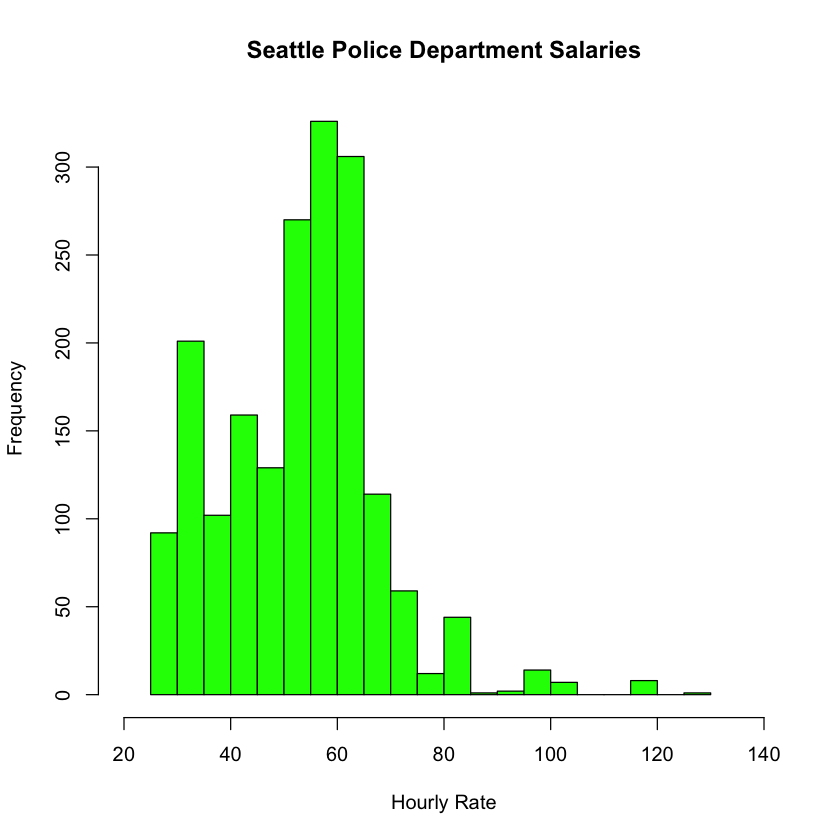

In [102]:
spd_salaries <- filter(seattle_wage_2020,Department=="Police Department")
hist(spd_salaries$'Hourly Rate',
    col='Green',
    breaks=20,
    xlim=range(20,140),
    main="Seattle Police Department Salaries",
    xlab="Hourly Rate")

## Distributions

All of the distributions that we learn in this class have a set of functions in R. The naming convention for these set  of functions goes `single letter + abbreviated name of distribution`. Each of the abbreviated letters stand for a piece of specific information about the distribution.

- `d+abbreviated name of distribution`: outputs value of density function
- `r+abbreviated name of distribution`: outputs a vector of random values chosen according to the distribution
- `p+abbreviated name of distribution`: outputs probability of $x$ being less than or equal to a value
- `q+abbreviated name of distribution`: outputs $x$ such that choosing a value less than or equal to it has a specific probability

Here is a list of the common distributions we have encountered and their abbreviations.

- Exponential, `exp` 
- Normal, `norm`
- Weibull, `weibull`
- Lognormal, `lnorm`
- Uniform, `unif`
- Binomial, `binom`
- Poisson, `pois`

Therefore if I wanted to create a set of 10 values according to the Poisson distribution with $\lambda=4.5$ I would use `rpois(10,lambda=4.5)`

In [161]:
rpois(10,lambda=4.5)

[1] 4 5 5 6 5 1 3 3 6 4

Or if I wanted to find what the probability of choosing a value less than 10000 from an exponential distribution where $\lambda=1/10000$ I would use `pexp(10000,rate=1/10000)`

In [112]:
pexp(10000, rate=1/10000)

[1] 0.6321206

and if I wanted to find the top 15% of the same exponential distribution I would use `qexp(.15, rate=1/10000,lower.tail=FALSE)`

In [113]:
qexp(.15, rate=1/10000,lower.tail=FALSE)

[1] 18971.2

This was a brief introduction, but keep in mind you can always use the `help()` function to find any documentation of a function that you might be confused using